In [4]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

In [140]:
class Sarsa:
    def __init__(self, h, w, wind, start, des, noise=False):
        # init Q, wind, A
        self.h = h
        self.w = w
        # if no stop action, change 9 to 8 in self.q and self.e_greedy(), change self.actions
        self.q = np.random.rand(h, w, 9)
        self.wind = wind
        self.actions = [[i, j] for i in [-1, 0, 1] for j in [-1, 0, 1]]
        self.start = start
        self.des = des
        self.noise = noise
    
    def policy_loop(self, num_iters, alpha=0.5, epsilon=0.1, gamma=1, reward=-1):
        # set Q of destination zero
        self.q[self.des[0], self.des[1], :] = 0
        # show the progress
        start_ = time.time()
        # count the steps of episodes
        steps = 0
        # big loop
        for num in range(num_iters):
            if (num % 1000 == 0):
                end_ = time.time()
                print(f"Big loop {num}: {round(num / num_iters * 100, 2)} %   cost {round(end_ - start_, 2)} s")
                start_ = time.time()
            # init start point
            state = self.start
            index = self.e_greedy(state, epsilon)
            while True:
                # epsilon-greedy
                v1, v2 = self.actions[index]
                i = np.clip(state[0] + v1, 0, self.h - 1)
                j = np.clip(state[1] + v2, 0, self.w - 1)
                next_state = (np.clip(i - self.wind[j] + np.random.choice([-1, 0, 1]), 0, self.h - 1), j) if self.noise else \
                             (np.clip(i - self.wind[j], 0, self.h - 1), j)
                next_index = self.e_greedy(next_state, epsilon)
                self.q[state[0], state[1], index] += alpha * (reward + \
                                                              gamma * self.q[next_state[0], next_state[1], next_index] - \
                                                              self.q[state[0], state[1], index])
                state = next_state
                index = next_index
                steps += 1
                if state == self.des:
                    break
        print("Done!")
        # average step
        print(f"mean step of an episode: {round(steps / num_iters, 2)}")
        
    def show_policy(self):
        state = self.start
        index = np.argmax(self.q[state[0], state[1], :])
        states = []
        while True:
            states.append(state)
            # optimal strategy
            v1, v2 = self.actions[index]
            i = np.clip(state[0] + v1, 0, self.h - 1)
            j = np.clip(state[1] + v2, 0, self.w - 1)
            next_state = (np.clip(i - self.wind[j] + np.random.choice([-1, 0, 1]), 0, self.h - 1), j) if self.noise else \
                             (np.clip(i - self.wind[j], 0, self.h - 1), j)
            next_index = np.argmax(self.q[next_state[0], next_state[1], :])
            state = next_state
            if not self.noise and state in states:
                break
            index = next_index
            if state == self.des:
                break
        
        # plot the line
        plt.figure()
        plt.scatter(states[0][1] + 0.5, states[0][0] + 0.5, c="black")
        for i in np.arange(1, len(states)):
            plt.plot((states[i - 1][1] + 0.5, states[i][1] + 0.5), (states[i - 1][0] + 0.5, states[i][0] + 0.5), "black")
            plt.scatter(states[i][1] + 0.5, states[i][0] + 0.5, c="black")
        plt.grid()
        plt.xticks(np.arange(0, self.w))
        plt.yticks(np.arange(0, self.h))
        plt.ylim(self.h, 0)
        plt.show()
        
    def e_greedy(self, state, epsilon):
        index = -1
        if np.random.choice([0, 1], p=[epsilon, 1 - epsilon]):
            index = np.argmax(self.q[state[0], state[1], :])
        else:
            index = np.random.choice(9)
        return index
            
    
    def reset(self):
        self.__init__()

Big loop 0: 0.0 %   cost 0.0 s
Big loop 1000: 12.5 %   cost 0.76 s
Big loop 2000: 25.0 %   cost 0.48 s
Big loop 3000: 37.5 %   cost 0.48 s
Big loop 4000: 50.0 %   cost 0.47 s
Big loop 5000: 62.5 %   cost 0.48 s
Big loop 6000: 75.0 %   cost 0.48 s
Big loop 7000: 87.5 %   cost 0.46 s
Done!
mean step of an episode: 18.79


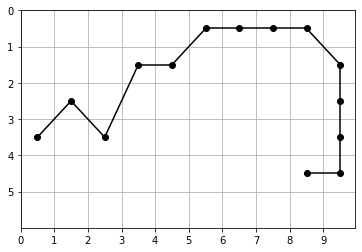

In [129]:
if __name__ == "__main__":
    wind = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
    s = Sarsa(6, 10, wind, (3, 0), (3, 7))
    s.policy_loop(8000)
    s.show_policy()
    
    """
    # noise condition
    wind = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
    s = Sarsa(6, 10, wind, (3, 0), (3, 7), noise=True)
    s.policy_loop(8000)
    s.show_policy()
    """